In [1]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
sns.set_theme()

Function for cleaning the dataset

In [2]:
def clean(dataset):
    codes = dataset.groupby("Area Code").count().index
    i = 0
    data1 = [pd.DataFrame()] * len(codes)
    curName = ""
    for ind in codes:
        data1[i] = dataset[dataset["Area Code"] == ind]
        curName = data1[i]["Area Name"].reset_index(drop=True)[0]
        data1[i] = data1[i].pivot_table("Value",index="Year",columns="Series",aggfunc='mean')
        data1[i]["Area Code"] = [ind] * len(data1[i])
        data1[i]["Area Name"] = [curName] * len(data1[i])
        data1[i]=data1[i].reset_index()
        i = i+1

    data_final = data1[0]
    for ind in range(len(data1)):
        if(ind!=0):
            data_final = pd.concat([data_final, data1[ind]])
    data_final = data_final.reset_index(drop=True)
    return data_final

def recent(df):
    new_df = ((df.sort_values(by=['Year']).drop_duplicates(subset=['Area Name'], keep='last')).sort_values(by = ['Area Name']))
    new_df = new_df.drop(columns = ['Year'])
    return new_df

In [3]:
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding='latin-1')
data_growth = pd.read_csv("SYB61_253_Population Growth Rates in Urban areas and Capital cities.csv", encoding = "latin-1")
data_pop = pd.read_csv("SYB64_1_202110_Population, Surface Area and Density.csv", encoding = "latin-1")
data_trade = pd.read_csv("SYB64_123_202110_Total Imports Exports and Balance of Trade.csv", encoding = "latin-1")
data_cpi = pd.read_csv("SYB64_128_202110_Consumer Price Index.csv", encoding = "latin-1")
data_land = pd.read_csv("SYB64_145_202110_Land.csv", encoding = "latin-1")
data_employment = pd.read_csv("SYB64_200_202110_Employment.csv", encoding = "latin-1")
data_gdp = pd.read_csv("SYB64_230_202110_GDP and GDP Per Capita.csv", encoding = "latin-1")
data_mortality = pd.read_csv("SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv", encoding = "latin-1")
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding = "latin-1")
data_death = pd.read_csv("Death Cause Reason by Country.csv", encoding = "latin-1")

In [5]:
health = clean(data_health)
growth = clean(data_growth)
pop = clean(data_pop)
trade = clean(data_trade)
cpi = clean(data_cpi)
land = clean(data_land)
employment = clean(data_employment)
gdp = clean(data_gdp)
mortality = clean(data_mortality)


In [6]:
health.head()

Series,Year,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name
0,2005,9.9,3.4,4,Afghanistan
1,2010,8.6,2.3,4,Afghanistan
2,2016,11.0,2.1,4,Afghanistan
3,2017,11.8,2.3,4,Afghanistan
4,2018,9.4,1.8,4,Afghanistan


In [7]:
#health['Year'] = pd.to_datetime(health['Year'])
rec_health = recent(health)
rec_growth = recent(growth)
rec_pop = recent(pop)
rec_trade = recent(trade)
rec_cpi = recent(cpi)
rec_land = recent(land)
rec_employment = recent(employment)
rec_gdp = recent(gdp)
rec_mortality = recent(mortality)

In [8]:
rec_health.head(20)
print(rec_health.shape[0])

192


In [9]:
#merging = [df.set_index(['Area Name', 'Area Code']) for df in [rec_health, rec_growth, rec_pop, rec_trade, rec_cpi, rec_land, rec_employment, rec_gdp, rec_mortality]]
#merged = pd.concat(merging, axis=1).reset_index()
#merged.head()

df_merge = [rec_growth, rec_pop, rec_trade, rec_cpi, rec_land, rec_employment, rec_gdp, rec_mortality]
merged = rec_health
for df in df_merge:
    merged = merged.merge(df, how="left", on=['Area Name', 'Area Code'])
    #print(merged.shape[0])
#print(merged)
merged.head()

Series,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name,Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),...,Employment by industry: Services (%) Female,Employment by industry: Services (%) Male,Employment by industry: Services (%) Male and Female,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),"Maternal mortality ratio (deaths per 100,000 population)",Population annual rate of increase (percent),Total fertility rate (children per women)
0,9.4,1.8,4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,10.3,47.1,39.4,51.7,64.3,65.8,62.9,NaN,2.5,4.6
1,5.3,9.7,8,Albania,NaN,NaN,60.3,NaN,NaN,476.0,...,43.8,43.6,43.7,8.0,78.4,80.1,76.7,NaN,-0.1,1.6
2,6.2,10.7,12,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,...,73.2,57.1,59.6,21.2,76.6,77.8,75.4,NaN,2.0,3.1
3,6.7,18.6,20,Andorra,NaN,NaN,88.1,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,NaN
4,2.5,5.4,24,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,42.9,40.6,41.7,61.5,60.5,63.4,57.8,NaN,3.3,5.6


In [10]:
data_death.head()
#merged.head()

combine = pd.merge(merged, data_death, how = "inner", left_on = "Area Name", right_on = "Country Name")
combine.head()

,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name,Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),...,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes,Unnamed: 32
0,9.4,1.8,4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,21247,485,1687,406,8254,59,1613,24295,4817,NaN
1,5.3,9.7,8,Albania,NaN,NaN,60.3,NaN,NaN,476.0,...,4705,18,36,29,243,4,152,0,175,NaN
2,6.2,10.7,12,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,...,23816,782,526,526,11051,40,1515,13,5328,NaN
3,6.7,18.6,20,Andorra,NaN,NaN,88.1,NaN,NaN,23.0,...,230,0,0,0,8,0,8,0,9,NaN
4,2.5,5.4,24,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,12791,513,793,80,9253,114,1928,16,4033,NaN


/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/

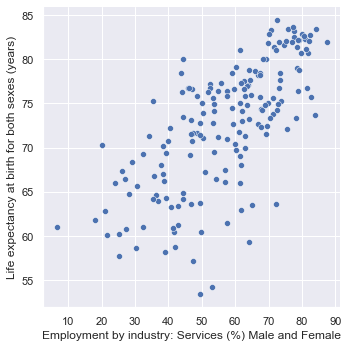

/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/stevenbochner/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


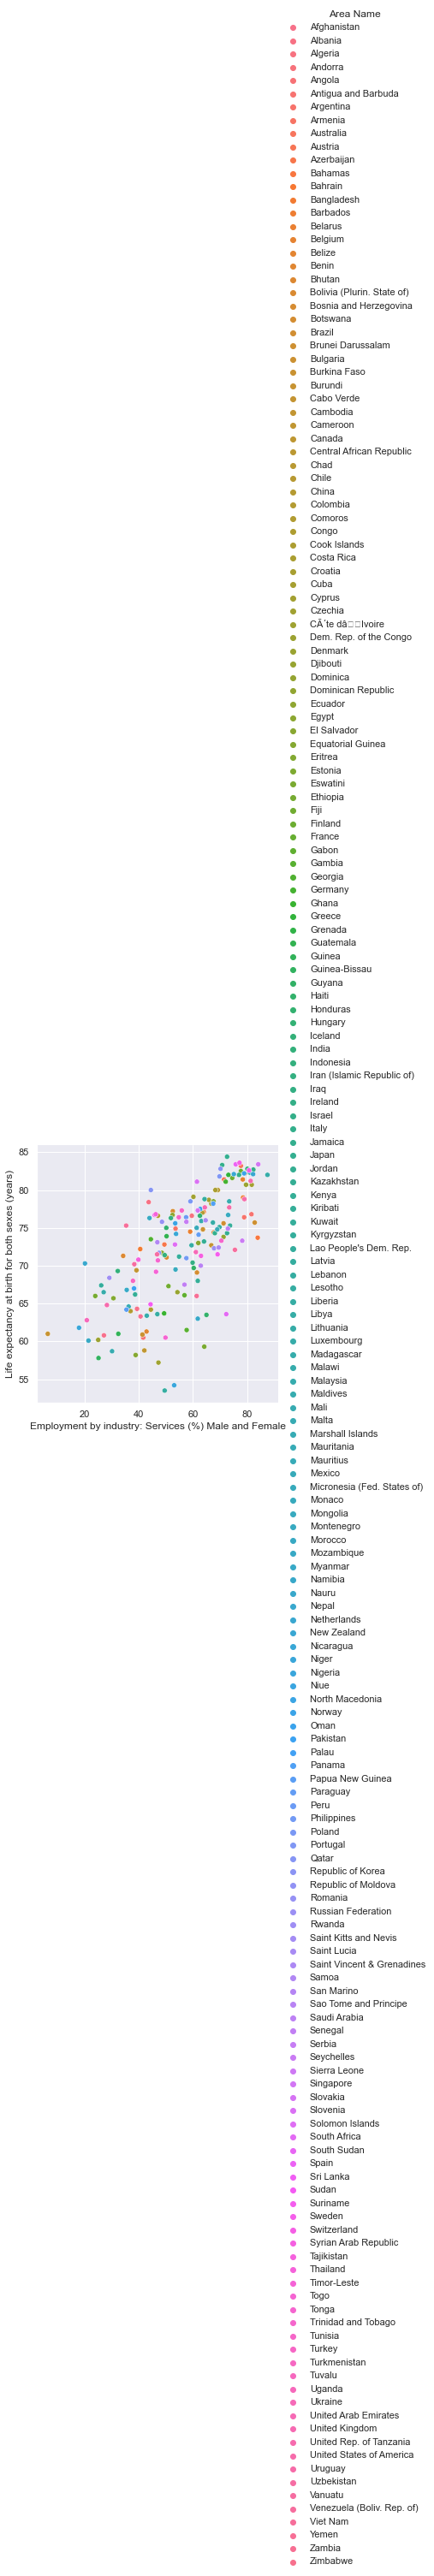

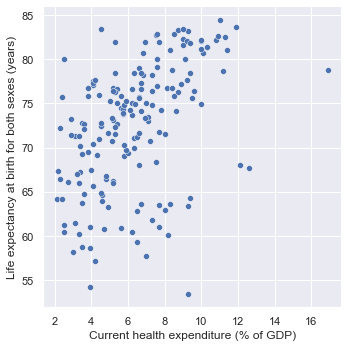

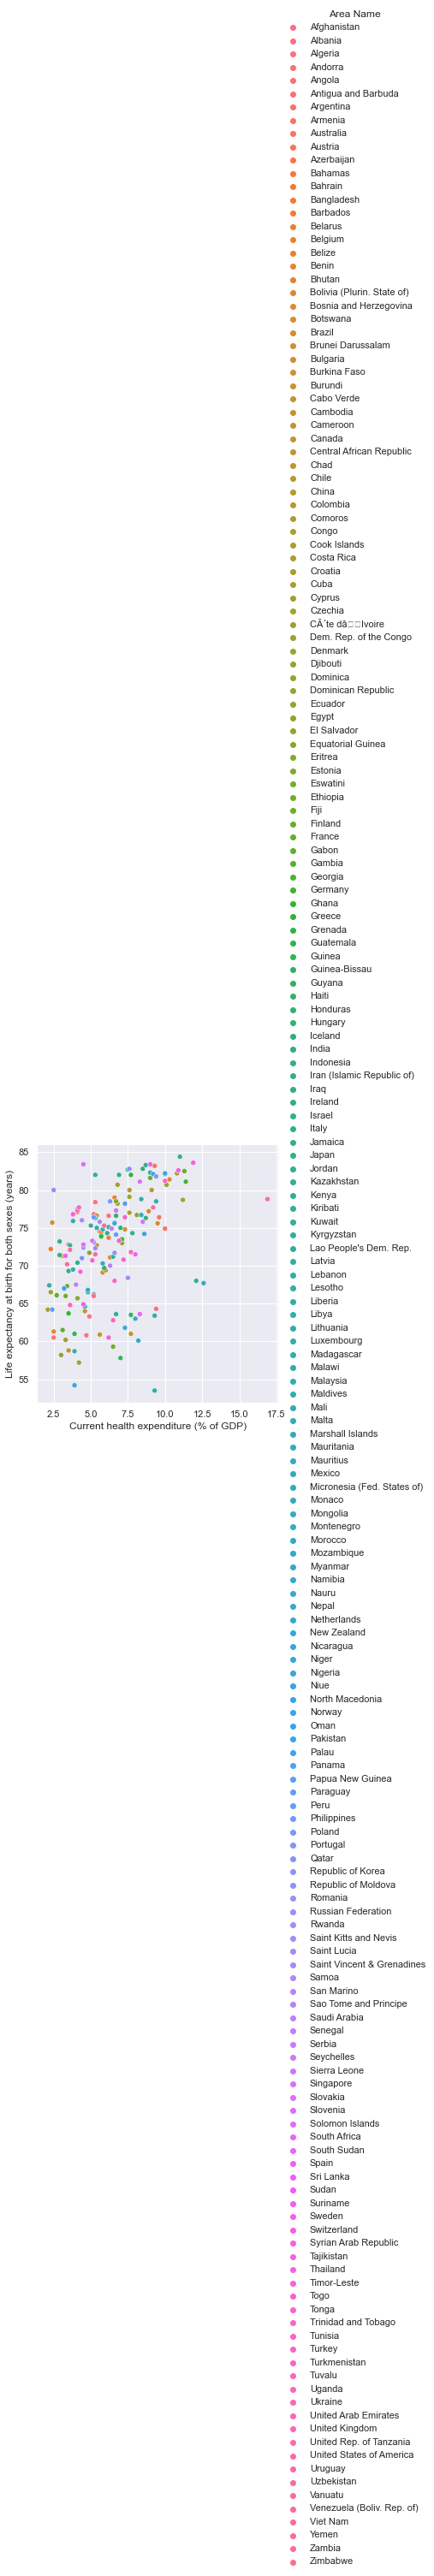

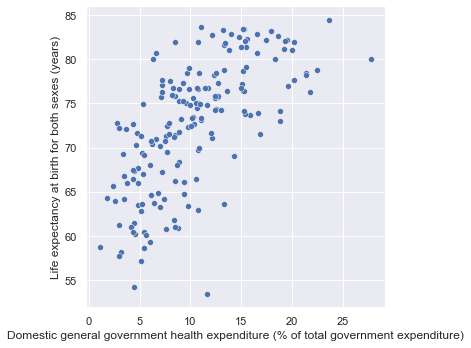

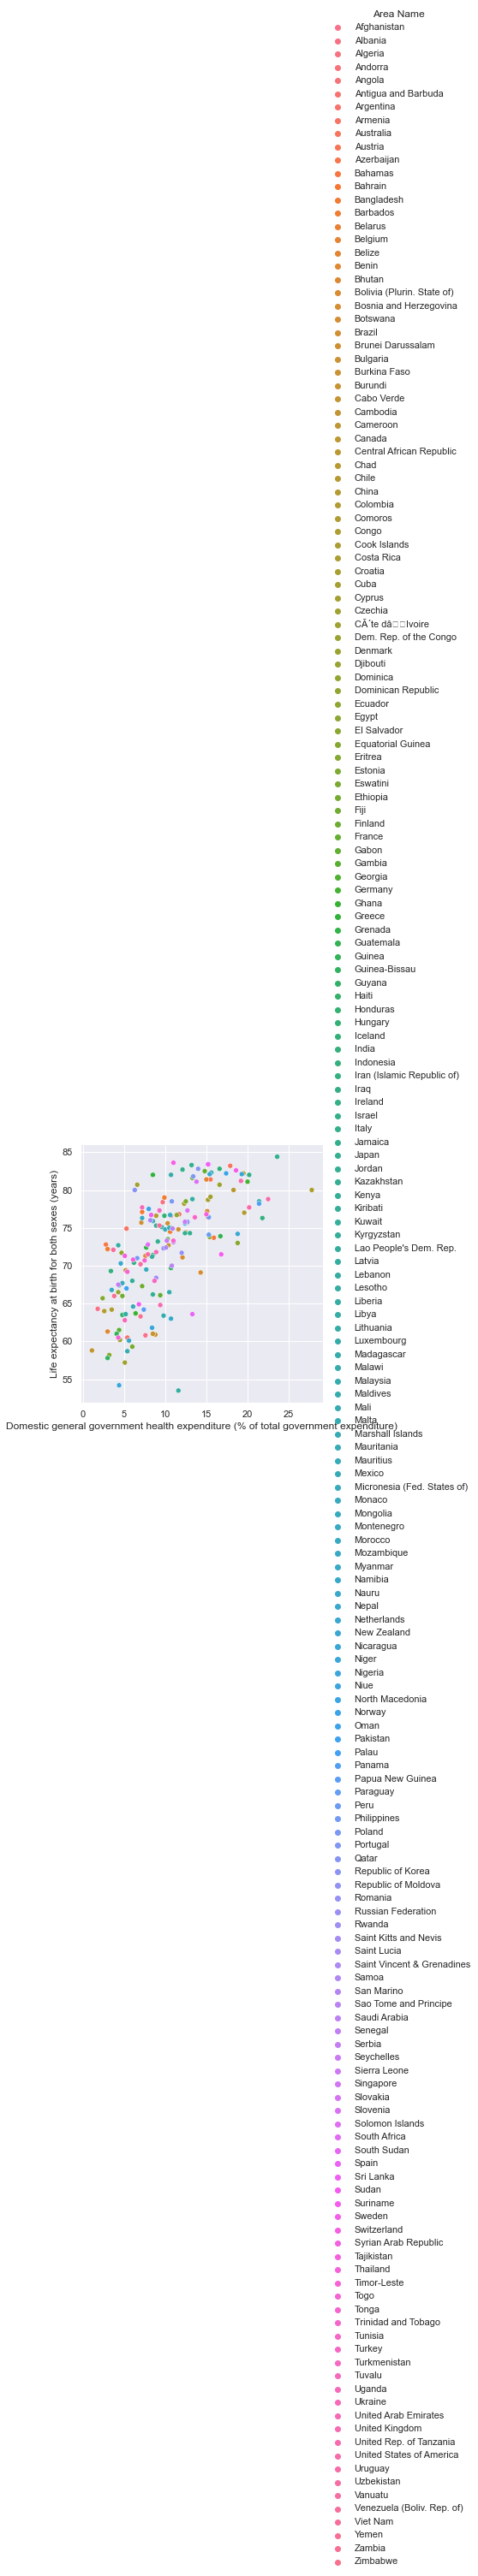

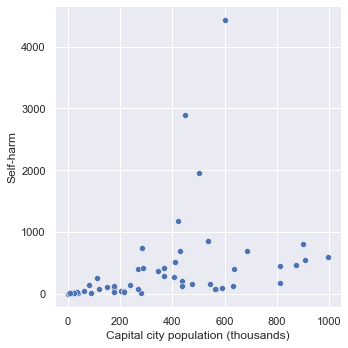

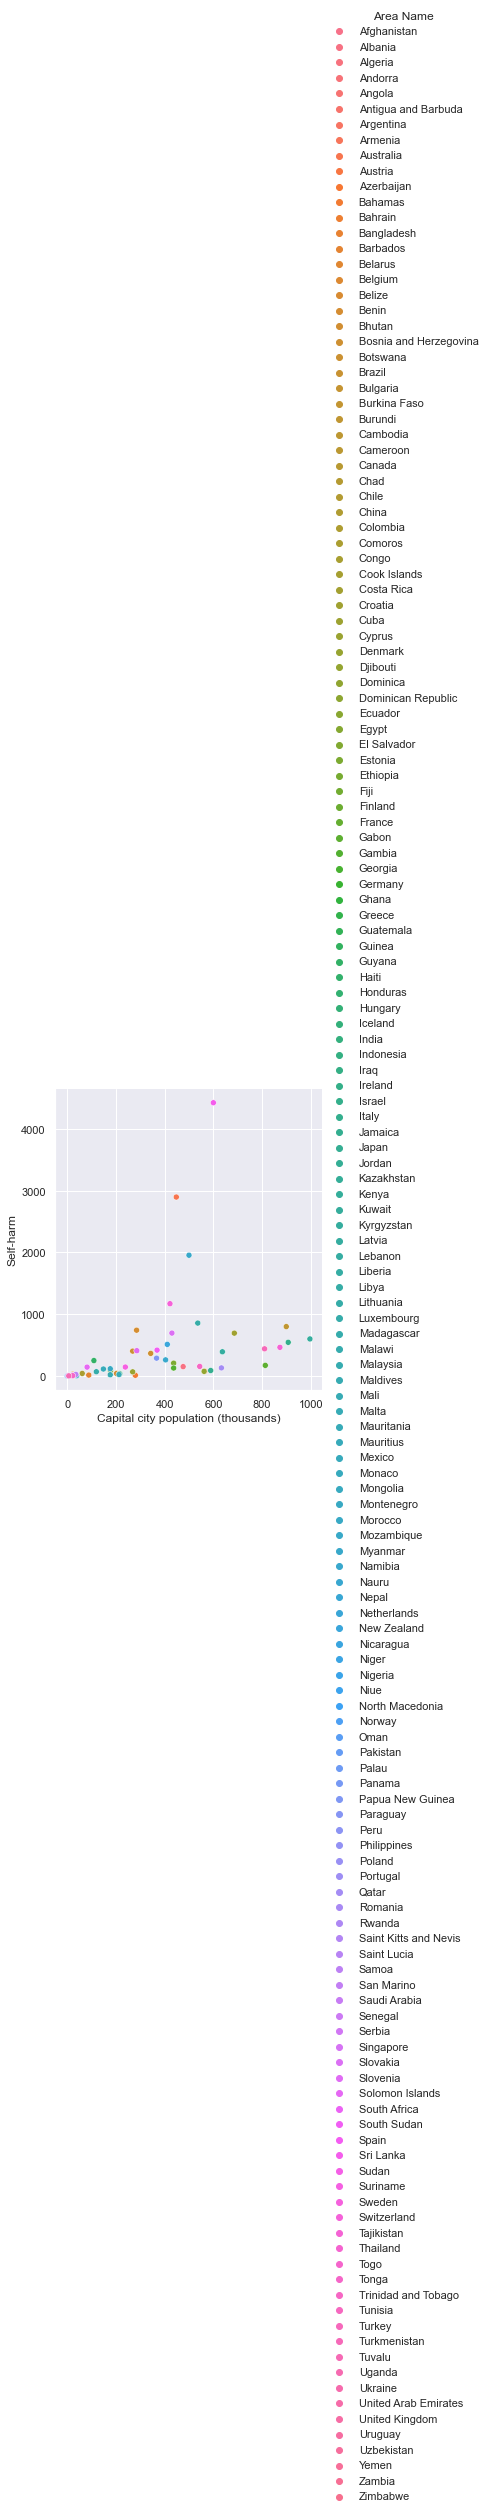

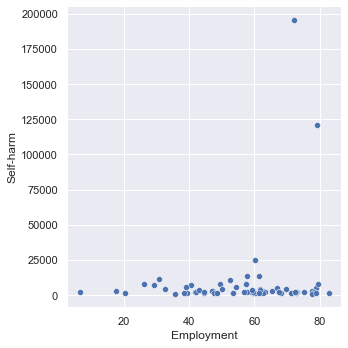

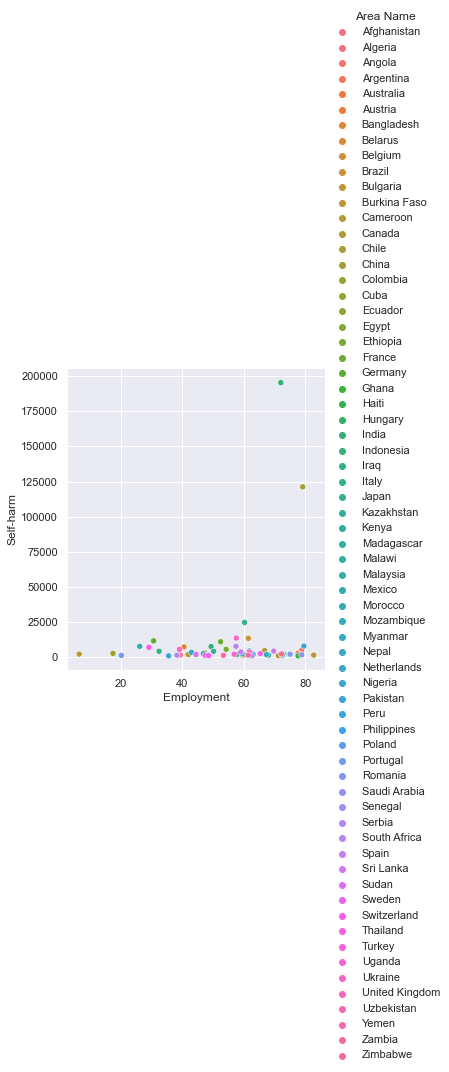

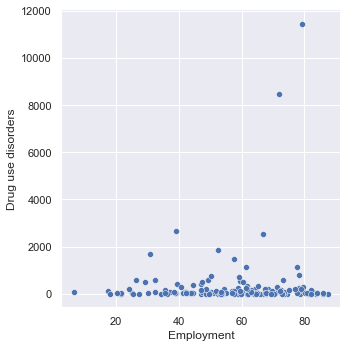

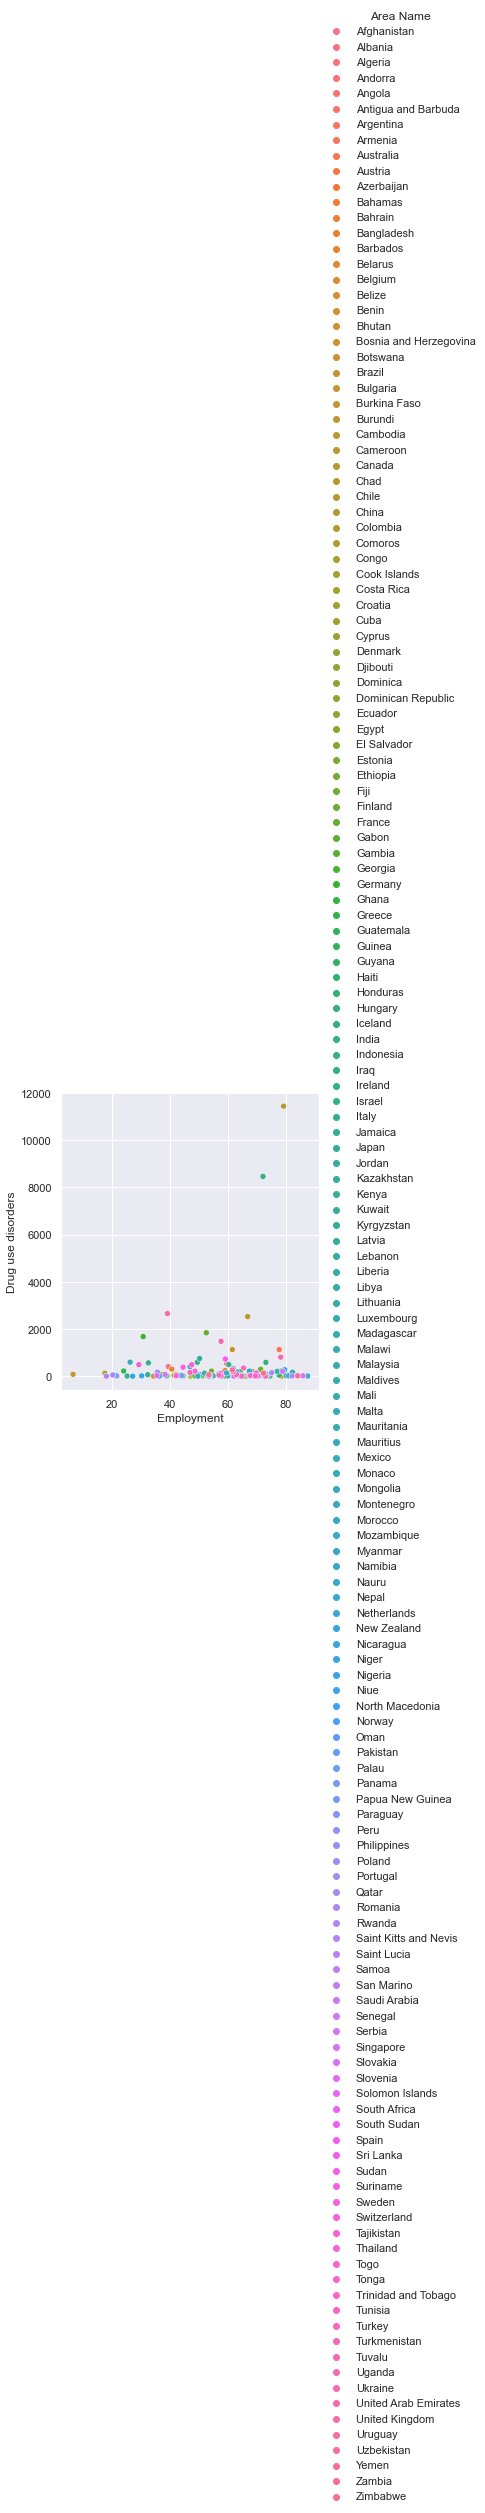

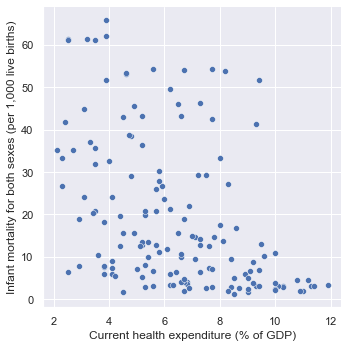

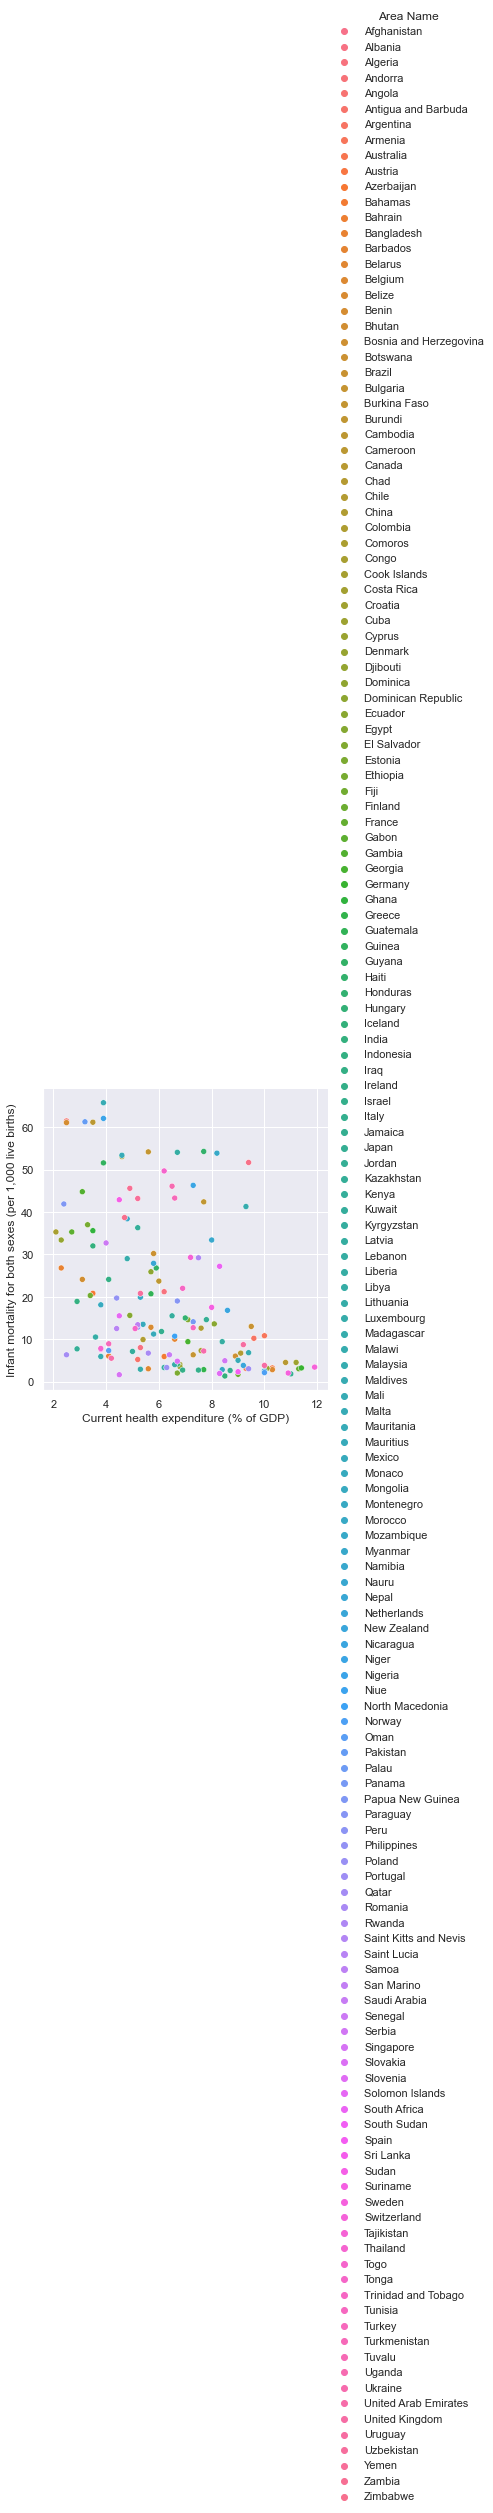

In [11]:
sns.relplot(data = merged, x = "Employment by industry: Services (%) Male and Female", y = "Life expectancy at birth for both sexes (years)")
sns.relplot(data = merged, x = "Employment by industry: Services (%) Male and Female", y = "Life expectancy at birth for both sexes (years)", hue = "Area Name")

sns.relplot(data = merged, x = "Current health expenditure (% of GDP)", y = "Life expectancy at birth for both sexes (years)")
sns.relplot(data = merged, x = "Current health expenditure (% of GDP)", y = "Life expectancy at birth for both sexes (years)", hue = "Area Name")

sns.relplot(data = merged, x = "Domestic general government health expenditure (% of total government expenditure)", y = "Life expectancy at birth for both sexes (years)")
sns.relplot(data = merged, x = "Domestic general government health expenditure (% of total government expenditure)", y = "Life expectancy at birth for both sexes (years)", hue = "Area Name")

sns.relplot(data = combine, x = "Capital city population (thousands)", y = "Self-harm" )
sns.relplot(data = combine, x = "Capital city population (thousands)", y = "Self-harm", hue = "Area Name" )

vis = combine
vis["Employment"] = merged["Employment by industry: Services (%) Male and Female"]
vis1 = vis[vis["Self-harm"] > 1000]

sns.relplot(data = vis1, x = "Employment", y = "Self-harm")
sns.relplot(data = vis1, x = "Employment", y = "Self-harm", hue = "Area Name")

sns.relplot(data = vis, x = "Employment", y = "Drug use disorders")
sns.relplot(data = vis, x = "Employment", y = "Drug use disorders", hue = "Area Name")

sns.relplot(data = combine, x = "Current health expenditure (% of GDP)", y = "Infant mortality for both sexes (per 1,000 live births)")
sns.relplot(data = combine, x = "Current health expenditure (% of GDP)", y = "Infant mortality for both sexes (per 1,000 live births)", hue = "Area Name")
